In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Project: Netflix Dataset

### Setup
For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.

### Installing Required Libraries

In [ ]:
%pip install seaborn
%pip install folium

## Importing Required Libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import datetime 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Load the dataset

In [12]:
try:
    url = '/kaggle/input/netflix-shows/netflix_titles.csv'
    df=pd.read_csv(url)
except FileNotFoundError:
    print("The file 'cause_of_deaths.csv' was not found.")
    exit()
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## Display initial information 

In [13]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [14]:
df.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [15]:
df.shape

(8807, 12)

## Data Cleaning & Processing: To clean and organize the dataset, you can use Python libraries such as Pandas and NumPy. Here are some steps you can follow:

### 1- Handle missing values: Use Pandas to identify and handle missing values in the dataset.

In [16]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [17]:
# Calculate percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_percentage

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [18]:
# Example: Fill missing values in the 'director' column with 'Unknown'
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
# Example: Drop rows with missing 'date_added' values
df = df.dropna(subset=['date_added'])

In [19]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          4
duration        3
listed_in       0
description     0
dtype: int64

In [20]:
# check what every column have
for col in df.columns:
    print( col,':', df[col].nunique())
    print(df[col].value_counts().nlargest(5))
    print('\n' + '*' * 20 + '\n')

show_id : 8797
show_id
s1       1
s5869    1
s5863    1
s5864    1
s5865    1
Name: count, dtype: int64

********************

type : 2
type
Movie      6131
TV Show    2666
Name: count, dtype: int64

********************

title : 8797
title
Dick Johnson Is Dead                                1
Hannibal Buress: Comedy Camisado                    1
Netflix Presents: The Characters                    1
Your lie in April                                   1
Crouching Tiger, Hidden Dragon: Sword of Destiny    1
Name: count, dtype: int64

********************

director : 4529
director
Unknown                   2624
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Name: count, dtype: int64

********************

cast : 7683
cast
Unknown                                                                                    825
David Attenborough                                                                          19
Vats

In [21]:
df.describe()

,release_year
count,8797.000000
mean,2014.183472
std,8.822191
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [22]:
df.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8797,8797,8797,8797,8797,8797,8797,8797.000000,8793,8794,8797,8797
unique,8797,2,8797,4529,7683,749,1767,NaN,17,220,513,8765
top,s1,Movie,Dick Johnson Is Dead,Unknown,Unknown,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,2624,825,2812,109,NaN,3205,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.183472,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.822191,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8797 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8797 non-null   object
 1   type          8797 non-null   object
 2   title         8797 non-null   object
 3   director      8797 non-null   object
 4   cast          8797 non-null   object
 5   country       8797 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8797 non-null   int64 
 8   rating        8793 non-null   object
 9   duration      8794 non-null   object
 10  listed_in     8797 non-null   object
 11  description   8797 non-null   object
dtypes: int64(1), object(11)
memory usage: 893.4+ KB


In [24]:
# Convert date_added to datetime with the specific format
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')
df['date_added']

<ipython-input-24-dea5276fda96>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')


0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8797, dtype: datetime64[ns]

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8797 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8797 non-null   object        
 1   type          8797 non-null   object        
 2   title         8797 non-null   object        
 3   director      8797 non-null   object        
 4   cast          8797 non-null   object        
 5   country       8797 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8797 non-null   int64         
 8   rating        8793 non-null   object        
 9   duration      8794 non-null   object        
 10  listed_in     8797 non-null   object        
 11  description   8797 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 893.4+ KB


### Find And Remove Duplicates

In [26]:
print(df.duplicated().sum())

0


In [28]:
# check data type
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [27]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [29]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


## Exploratory Data Analysis(EDA)

### 1. Identify the most popular type.

In [37]:
type_value =df['type'].value_counts()

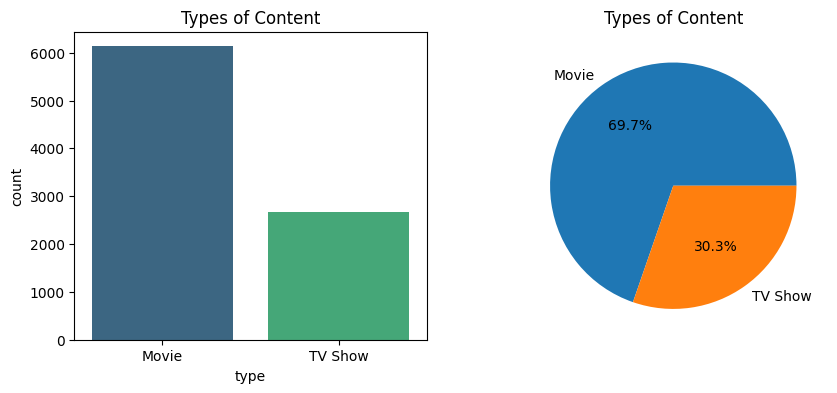

In [38]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

sns.countplot(data = df, x = 'type', palette = 'viridis', ax = axes[0])
axes[0].set_title('Types of Content')


axes[1].pie(type_value, labels = type_value.index, autopct = '%1.1f%%')
axes[1].set_title('Types of Content')
plt.show()

### 2.Which countries have the highest number of TV shows and Movies available on Netflix?

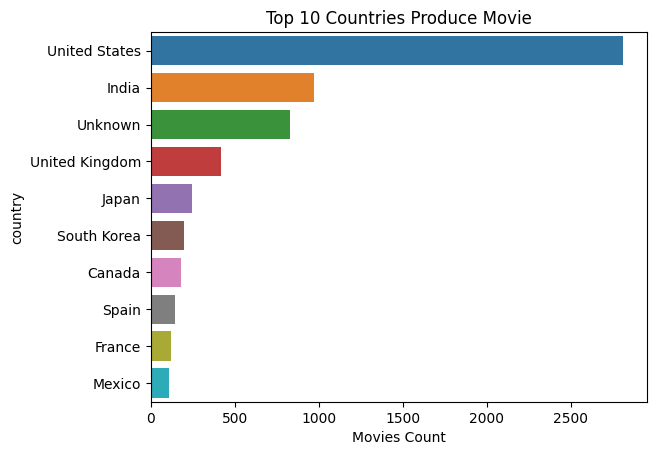

In [34]:
sns.countplot(y=df['country'] , data =df[df['type']=='Movie'] ,order =df['country'].value_counts().index[:10])
plt.xlabel('Movies Count')
plt.title('Top 10 Countries Produce Movie');

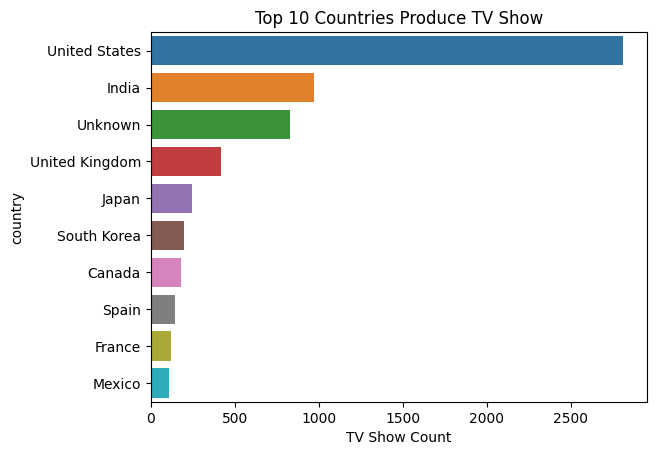

In [35]:
sns.countplot(y=df['country'] , data =df[df['type']=='TV Show'] ,order =df['country'].value_counts().index[:10])
plt.xlabel('TV Show Count')
plt.title('Top 10 Countries Produce TV Show');

**United States is the top leaader in both movie and TV shows followed by India**

### 3.Directors with the Most Films?

In [53]:
df['director'].value_counts()

director
Unknown                           2624
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: count, Length: 4529, dtype: int64

**Most of Movies and TV Show doesn't have Director name**

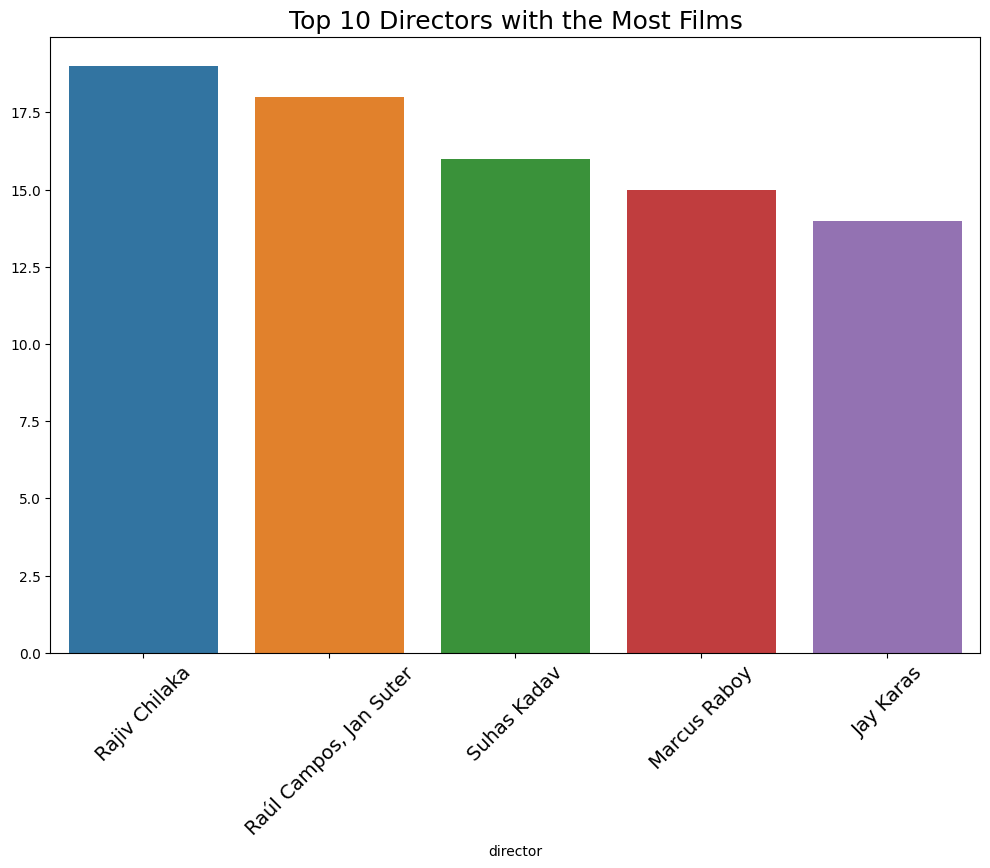

In [54]:
director_film = df[df["type"] == "Movie"]["director"].value_counts()[1:6]

plt.figure(figsize = (12,8))
sns.barplot(x = director_film.index, y = director_film.values)
plt.xticks(rotation = 45, fontsize = 14)
plt.title("Top 10 Directors with the Most Films",fontsize = 18)
plt.show()

### 4.How has the number of TV shows and Movies changed over time?

In [49]:
# deravative year column from 'date_added'
df['date_year']= df['date_added'].dt.year
df['date_year'].head()

type_year = (df.groupby(['type', 'date_year'])['title'].size()).reset_index()
type_year

,type,date_year,title
0,Movie,2008,1
1,Movie,2009,2
2,Movie,2010,1
3,Movie,2011,13
4,Movie,2012,3
5,Movie,2013,6
6,Movie,2014,19
7,Movie,2015,56
8,Movie,2016,253
9,Movie,2017,839


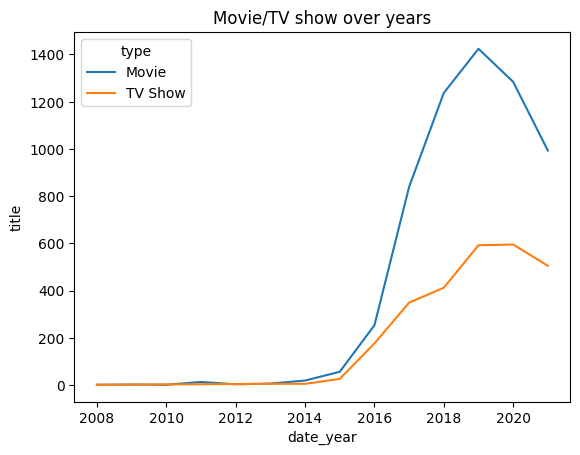

In [50]:
sns.lineplot(x = 'date_year' ,y = 'title',data =type_year ,hue = 'type')
plt.title("Movie/TV show over years")
plt.show();

**after 2015 Movie have much more better Growth Rate than TV Show**

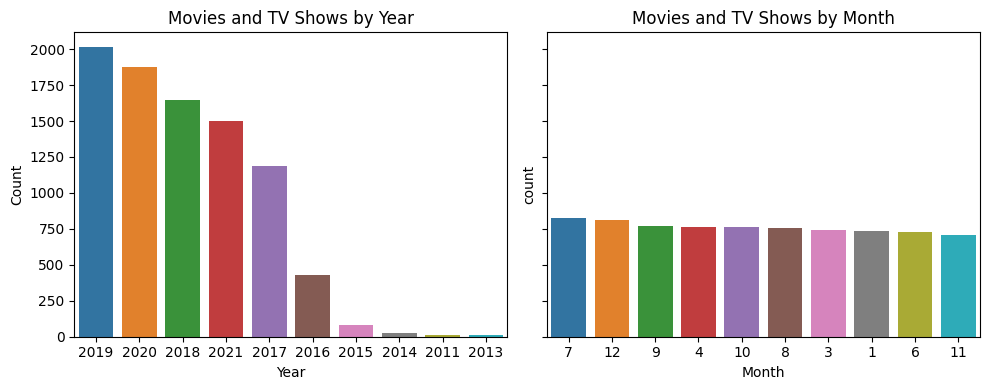

In [52]:
# which year & month have most Movie and TV Show
# Create the 'date_month' column if it doesn't exist
df['date_month'] = df['date_added'].dt.month

# Set up the subplots
g, axes = plt.subplots(1,2, figsize = (10,4), sharey=True)

# Plot for the years
sns.countplot(
    x='date_year',
    data=df,
    order=df['date_year'].value_counts().index[:10],
    ax=axes[0]
)
axes[0].set_title('Movies and TV Shows by Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Count')

# Plot for the months
sns.countplot(
    x='date_month',
    data=df,
    order=df['date_month'].value_counts().index[:10],
    ax=axes[1]
)
axes[1].set_title('Movies and TV Shows by Month')
axes[1].set_xlabel('Month')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


**2019 is the most year were Movie/TV show**

### 5.What is the average duration of TV shows and Movies on Netflix?

In [55]:
df[df.type == 'TV Show']['duration']

1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
5        1 Season
          ...    
8795    2 Seasons
8796    2 Seasons
8797    3 Seasons
8800     1 Season
8803    2 Seasons
Name: duration, Length: 2666, dtype: object

In [56]:
df[df.type == 'TV Show']['duration'].str.split(' ').str[0].astype(int).head()

1    2
2    1
3    1
4    2
5    1
Name: duration, dtype: int64

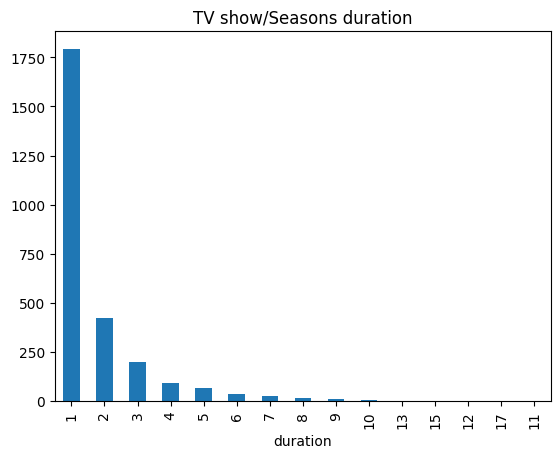

In [57]:
(df[df.type == 'TV Show']['duration'].str.split(' ').str[0].astype(int)).value_counts().plot(kind='bar');
plt.title('TV show/Seasons duration');

### 6.Number of TV Series and Movies Released Each Year

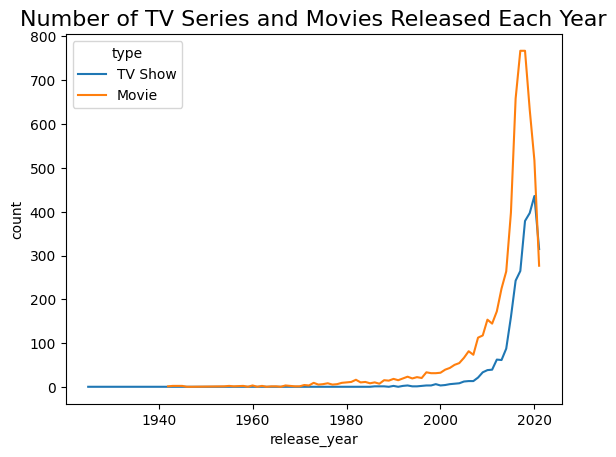

In [67]:
release_counts = df.groupby(["release_year", "type"]).size().reset_index(name="count")

sns.lineplot(data=release_counts, x="release_year", y="count", hue="type")
plt.title("Number of TV Series and Movies Released Each Year", fontsize = 16)
plt.show()

### 7.Top 10 Most Listed Categories

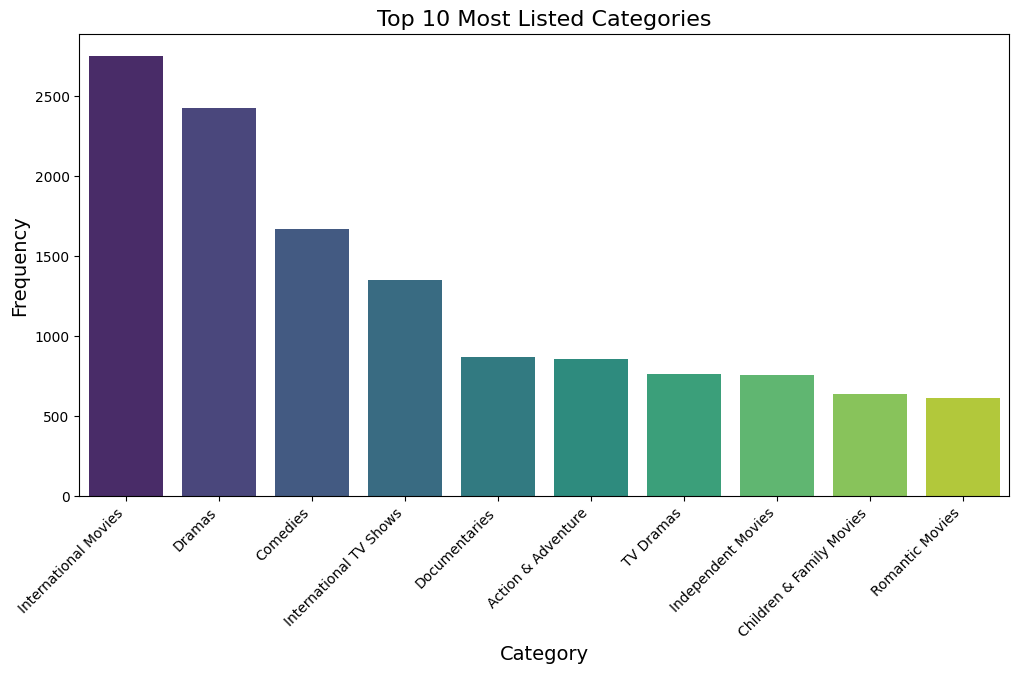

In [68]:
categories = df['listed_in'].str.split(',').explode().str.strip()  
top_10_categories = categories.value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_categories.index, y=top_10_categories.values, palette='viridis')

plt.title('Top 10 Most Listed Categories', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.show()

### 8.What is the distribution of movie and TV show ratings on Netflix?

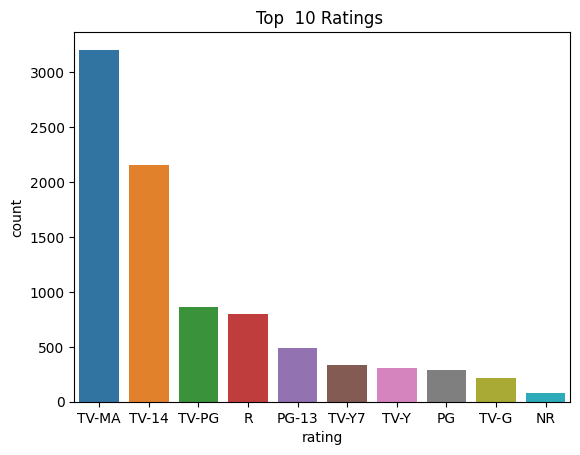

In [69]:
sns.countplot(x = df['rating'], order=df['rating'].value_counts().index[:10])
plt.title('Top  10 Ratings ') 
plt.show()

### 9.What is the top Countries have diffrenet categories of genres?

In [71]:
top_categories = pd.DataFrame(df.groupby(['country','listed_in']).size().groupby(['country']).idxmax()).rename(
    columns={0:'top category'})
top_categories

,top category
country,
", France, Algeria","(, France, Algeria, Dramas, Independent Movies..."
", South Korea","(, South Korea, International TV Shows, TV Dra..."
Argentina,"(Argentina, Stand-Up Comedy)"
"Argentina, Brazil, France, Poland, Germany, Denmark","(Argentina, Brazil, France, Poland, Germany, D..."
"Argentina, Chile","(Argentina, Chile, Dramas, Independent Movies,..."
...,...
Venezuela,"(Venezuela, Documentaries, International Movies)"
"Venezuela, Colombia","(Venezuela, Colombia, Documentaries, Internati..."
Vietnam,"(Vietnam, Action & Adventure, Comedies, Intern..."


In [72]:
top_categories.loc['Egypt']

top category    (Egypt, Comedies, International Movies)
Name: Egypt, dtype: object